In [8]:
# Importing the libraries

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

### The objective of this case study is to look for insights through visualization and provide guidance for those who want to reach among top YouTube channels.

We will be looking into the following:

Which channels are the most popular?

Which categories are the highest earning?

Which  are the fastest growing channel types?

In [9]:
# Loading the csv into pandas DataFrame
df = pd.read_csv("/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv", encoding = 'LATIN-1')


In [10]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [11]:
# Getting an an overiview of the data

# df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

### Cleaning the dataset

In [12]:
# 1. Standardize the string case to lower

for i in df.columns :
    if df[i].dtype == 'O' :
        df[i] = df[i].str.lower()

df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,t-series,245000000,2.280000e+11,music,t-series,20082,india,in,music,...,2000000.0,2006.0,mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,youtube movies,170000000,0.000000e+00,film & animation,youtubemovies,1,united states,us,games,...,NaN,2006.0,mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,mrbeast,166000000,2.836884e+10,entertainment,mrbeast,741,united states,us,entertainment,...,8000000.0,2012.0,feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,cocomelon - nursery rhymes,162000000,1.640000e+11,education,cocomelon - nursery rhymes,966,united states,us,education,...,1000000.0,2006.0,sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,set india,159000000,1.480000e+11,shows,set india,116536,india,in,entertainment,...,1000000.0,2006.0,sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [13]:
# 2. Drop duplicate rows

df.drop_duplicates(inplace=True)

df.shape

(995, 28)

In [14]:
# 3. Finding missing values

df.isnull().sum() / len(df) * 100

rank                                        0.000000
Youtuber                                    0.000000
subscribers                                 0.000000
video views                                 0.000000
category                                    4.623116
Title                                       0.000000
uploads                                     0.000000
Country                                    12.261307
Abbreviation                               12.261307
channel_type                                3.015075
video_views_rank                            0.100503
country_rank                               11.658291
channel_type_rank                           3.316583
video_views_for_the_last_30_days            5.628141
lowest_monthly_earnings                     0.000000
highest_monthly_earnings                    0.000000
lowest_yearly_earnings                      0.000000
highest_yearly_earnings                     0.000000
subscribers_for_last_30_days               33.

`subscribers_for_last_30_days` has 33% data missing.

Also, we notice several features that are not so useful.

Dropping redundant features

In [15]:
df.drop(['Abbreviation',
         'video_views_for_the_last_30_days',
         'subscribers_for_last_30_days',
         'created_month',
         'created_date'],
          inplace=True, axis=1)

df.isnull().sum() / len(df) * 100

rank                                        0.000000
Youtuber                                    0.000000
subscribers                                 0.000000
video views                                 0.000000
category                                    4.623116
Title                                       0.000000
uploads                                     0.000000
Country                                    12.261307
channel_type                                3.015075
video_views_rank                            0.100503
country_rank                               11.658291
channel_type_rank                           3.316583
lowest_monthly_earnings                     0.000000
highest_monthly_earnings                    0.000000
lowest_yearly_earnings                      0.000000
highest_yearly_earnings                     0.000000
created_year                                0.502513
Gross tertiary education enrollment (%)    12.361809
Population                                 12.

There are ~12% channels with `NaN` in `country` column.

Also, other country dependent metrics have ~12% missing values, which signifies they should be missing in the same rows.

In [16]:
df.drop(df[df['Country'].isnull()].index , inplace=True)

df.isnull().sum() / len(df) * 100

rank                                       0.000000
Youtuber                                   0.000000
subscribers                                0.000000
video views                                0.000000
category                                   4.467354
Title                                      0.000000
uploads                                    0.000000
Country                                    0.000000
channel_type                               0.801833
video_views_rank                           0.114548
country_rank                               0.114548
channel_type_rank                          1.030928
lowest_monthly_earnings                    0.000000
highest_monthly_earnings                   0.000000
lowest_yearly_earnings                     0.000000
highest_yearly_earnings                    0.000000
created_year                               0.343643
Gross tertiary education enrollment (%)    0.114548
Population                                 0.114548
Unemployment

In [17]:
df.shape

(873, 23)

**Looking at the difference between the columns 'channel_type' and 'category'.**

That might be useful, since both columns can be used for similar analyses.

In [18]:
# Looking at the difference between channel type and channel category

unique_categories = df['category'].unique()

unique_channel_types = df['channel_type'].unique()

print("Unique Categories:", unique_categories)

print("\n\nUnique Channel Types:", unique_channel_types)

Unique Categories: ['music' 'film & animation' 'entertainment' 'education' 'shows'
 'people & blogs' 'gaming' 'sports' 'howto & style' nan 'news & politics'
 'comedy' 'trailers' 'nonprofits & activism' 'science & technology'
 'movies' 'pets & animals' 'autos & vehicles' 'travel & events']


Unique Channel Types: ['music' 'games' 'entertainment' 'education' 'people' 'sports' 'film'
 'news' 'comedy' 'howto' 'nonprofit' 'tech' nan 'animals' 'autos']


In [19]:
print(df['category'].isnull().sum())

print(df['channel_type'].isnull().sum())

39
7


**We can decide to go with 'channel_type' to use in the analysis due to it having lesser categories, allowing for better detail per categories.**

In [20]:
df.drop('category', axis=1, inplace=True)

df.drop(df[df['channel_type'].isnull()].index , inplace=True)

df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
Title                                      0
uploads                                    0
Country                                    0
channel_type                               0
video_views_rank                           1
country_rank                               1
channel_type_rank                          2
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
created_year                               2
Gross tertiary education enrollment (%)    1
Population                                 1
Unemployment rate                          1
Urban_population                           1
Latitude                                   1
Longitude                                  1
dtype: int

In [21]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,866.000000,8.660000e+02,8.660000e+02,866.000000,8.650000e+02,865.000000,864.000000,866.000000,8.660000e+02,8.660000e+02,8.660000e+02,864.000000,865.000000,8.650000e+02,865.000000,8.650000e+02,865.000000,865.000000
mean,504.510393,2.289030e+07,1.128847e+10,10479.683603,2.501810e+05,353.727168,441.319444,39514.038303,6.317593e+05,4.738177e+05,7.586665e+06,2012.440972,63.654566,4.302735e+08,9.306335,2.246979e+08,26.687303,-14.787644
std,287.130158,1.789918e+07,1.483210e+10,36429.948289,9.350637e+05,1181.205338,1425.798133,73121.389735,1.168907e+06,8.764007e+05,1.403926e+07,4.407540,26.011047,4.717595e+08,4.889414,1.542215e+08,20.525123,84.686465
min,1.000000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1970.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,260.250000,1.450000e+07,4.281427e+09,306.000000,2.860000e+02,11.000000,25.000000,5150.000000,8.217500e+04,6.162500e+04,9.832750e+05,2009.000000,36.300000,8.342962e+07,5.360000,5.590832e+07,20.593684,-95.712891
50%,511.500000,1.755000e+07,7.751292e+09,889.000000,8.020000e+02,50.000000,61.000000,15950.000000,2.547500e+05,1.910500e+05,3.050000e+06,2013.000000,68.000000,3.282395e+08,9.710000,2.706630e+08,37.090240,-51.925280
75%,749.750000,2.410000e+07,1.358989e+10,3287.000000,2.269000e+03,122.000000,132.000000,40875.000000,6.541500e+05,4.906000e+05,7.875000e+06,2016.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7670.000000,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,2022.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


**We use the average of highest yearly earnings and lowest yearly earnings as a proxy for yearly earnings**

In [22]:
# We don't have data for every year so we decide to average the highest and lowest yearly earnings estimate
# Create a new column 'yearly_earnings' with the average of 'lowest_yearly_earnings' and 'highest_yearly_earnings'

df['yearly_earnings'] = (df['lowest_yearly_earnings'] + df['highest_yearly_earnings']) // 2

# Relationship Between Views and Subscribers
Here we will be looking at the relationship between views and subscribers

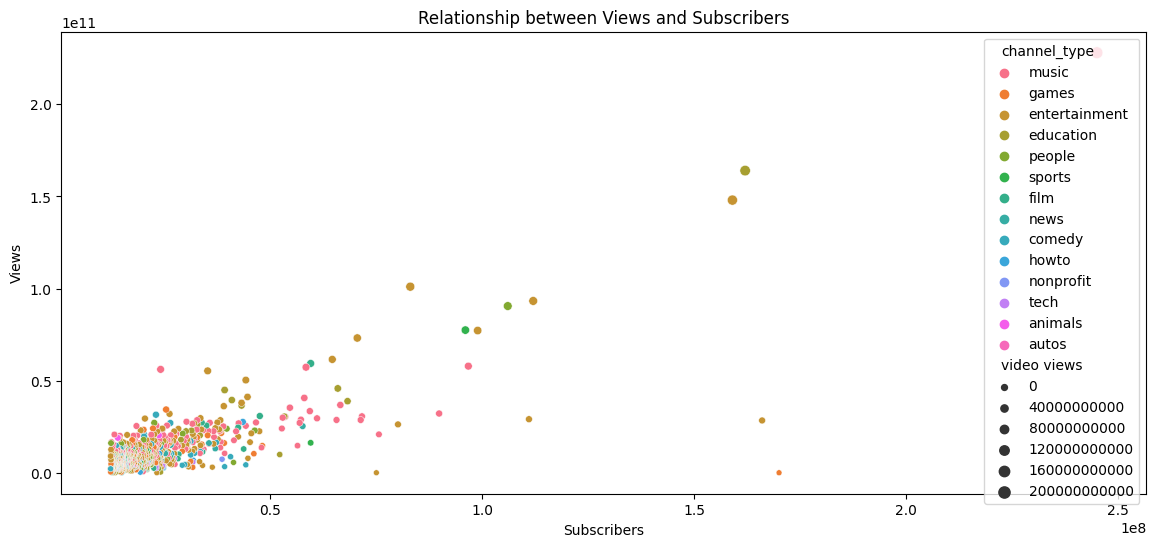

In [23]:
plt.figure(figsize=[14, 6])
# Create the scatter plot
sns.scatterplot(
    x=df["subscribers"],
    y=df["video views"],
    hue=df["channel_type"],    # Color-coding points based on the "category" column
    size=df["video views"] # Adjusting point sizes based on the "video views" column
)

# Set labels and title
plt.xlabel("Subscribers")
plt.ylabel("Views")
plt.title("Relationship between Views and Subscribers")

# Show the plot
plt.show()

It is shown to be linerarly correlated, which seems reasonable, and gives us a clue that the data could be reliable.

**Scatterplot showing the relationship between earnings and subscribers**

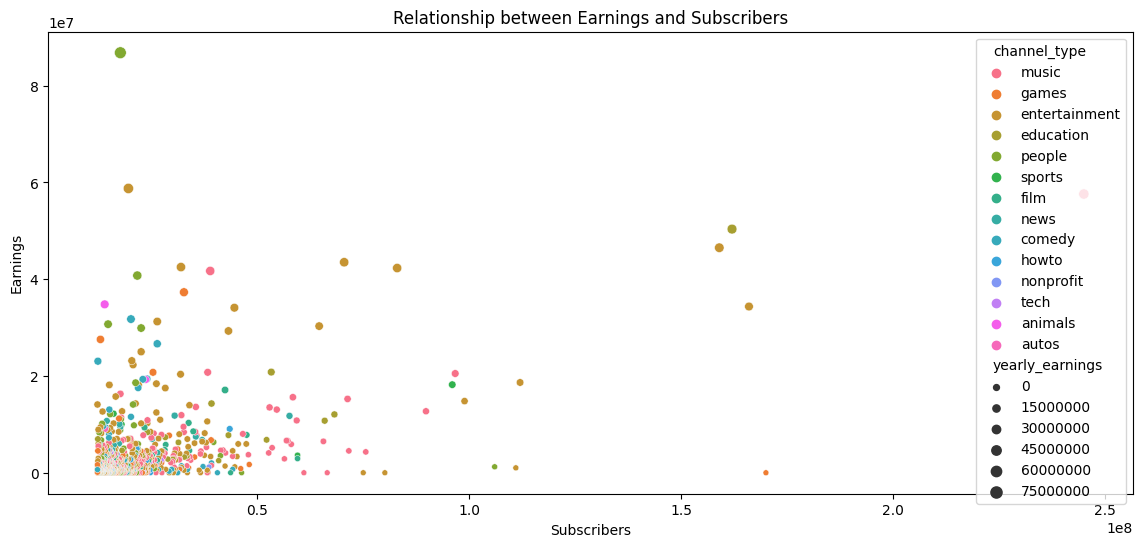

In [24]:
plt.figure(figsize=[14, 6])
# Create the scatter plot
sns.scatterplot(
    x=df["subscribers"],
    y=df["yearly_earnings"],
    hue=df["channel_type"],    # Color-coding points based on the "category" column
    size=df["yearly_earnings"] # Adjusting point sizes based on the "video views" column
)

# Set labels and title
plt.xlabel("Subscribers")
plt.ylabel("Earnings")
plt.title("Relationship between Earnings and Subscribers")

# Show the plot
plt.show()

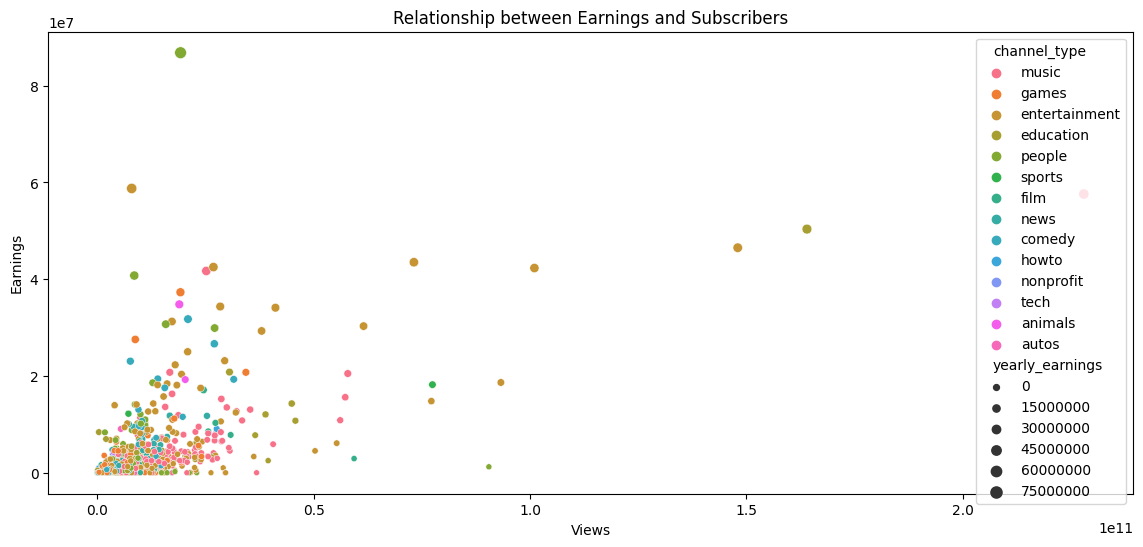

In [25]:
plt.figure(figsize=[14, 6])
# Create the scatter plot
sns.scatterplot(
    x=df["video views"],
    y=df["yearly_earnings"],
    hue=df["channel_type"],    # Color-coding points based on the "category" column
    size=df["yearly_earnings"] # Adjusting point sizes based on the "video views" column
)

# Set labels and title
plt.xlabel("Views")
plt.ylabel("Earnings")
plt.title("Relationship between Earnings and Subscribers")

# Show the plot
plt.show()

# Distribution of channels by their types

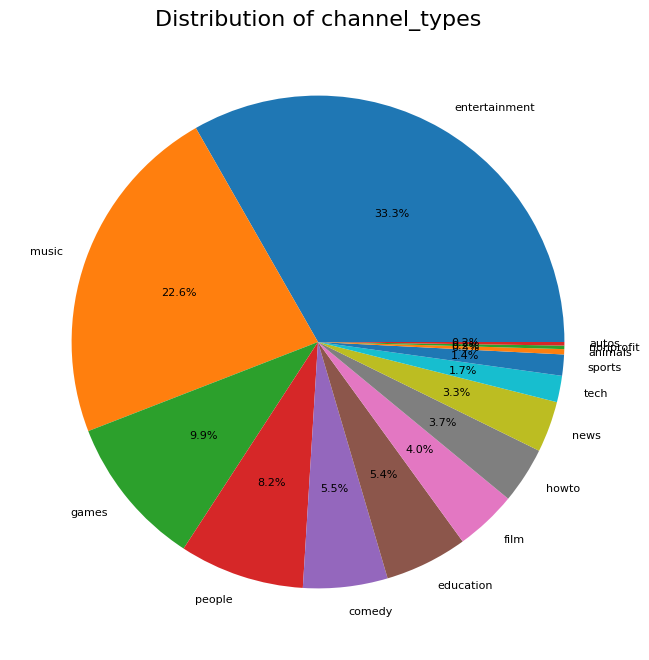

In [26]:
# Calculating the count of each category and sorting them
channel_type = df['channel_type'].value_counts().sort_values(ascending=False)

# Creating a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(channel_type.values, labels=channel_type.index, autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title("Distribution of channel_types", fontsize=16)

# Show the plot
plt.show()

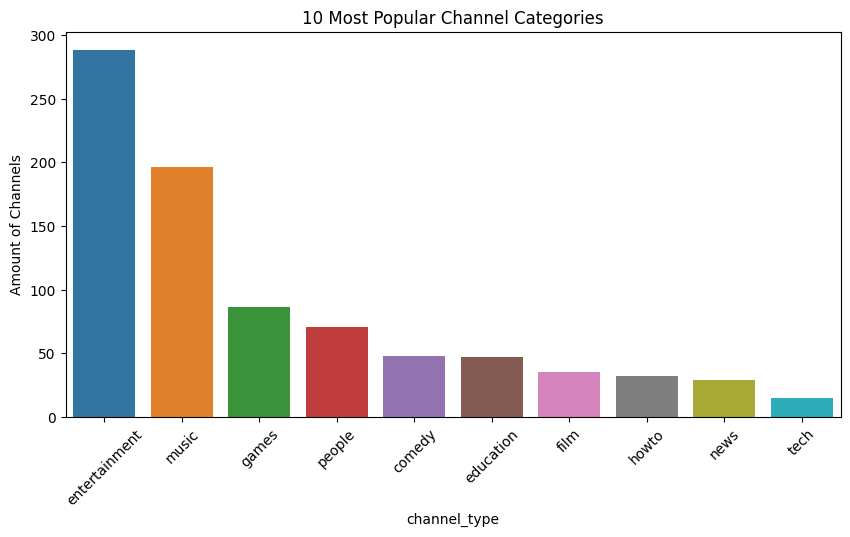

In [27]:
# Get the top 10 channel types
top_10_channel_types = df['channel_type'].value_counts().head(10)

# Create a countplot with seaborn
plt.figure(figsize=(10, 5))  # Adjust the figure size as per your preference
sns.countplot(
    data=df,
    x='channel_type',
    order=top_10_channel_types.index  # Order the categories based on their counts
)

# Add title and labels
plt.title('10 Most Popular Channel Categories')
plt.xlabel('channel_type')
plt.ylabel('Amount of Channels')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Category-Wise Average Subscribers Growth
We see that entertainment and music are popular, but which categories are growing the fastest on average?

In [28]:
# Calculate Channel Age
df['channel_age'] = 2023 - df['created_year']

# Calculate Average Subscribers growth per Year (asgpy)
df['annual_subscriber_growth'] = df['subscribers']/df['channel_age']

In [29]:
# Calculate the percentage growth for each category
channel_type_growth = df.groupby('channel_type')['annual_subscriber_growth'].mean().reset_index()

channel_type_growth.sort_values(by='annual_subscriber_growth', ascending=False)

,channel_type,annual_subscriber_growth
0,animals,3.925926e+06
11,people,3.335025e+06
3,education,3.127044e+06
4,entertainment,2.864402e+06
2,comedy,2.793231e+06
7,howto,2.694649e+06
5,film,2.649091e+06
10,nonprofit,2.585714e+06
8,music,2.296748e+06
6,games,2.140801e+06


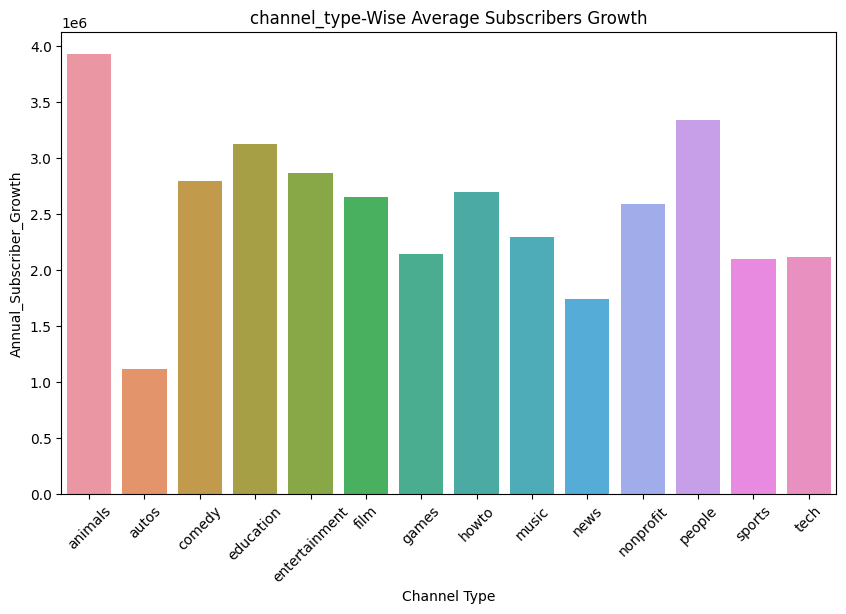

In [30]:
# Create the bar plot with Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
sns.barplot(
    data=channel_type_growth,
    x='channel_type',
    y='annual_subscriber_growth',
)

# Add title and labels
plt.title('channel_type-Wise Average Subscribers Growth')
plt.xlabel('Channel Type')
plt.ylabel('Annual_Subscriber_Growth')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Highest Yearly Earnings Average by channel_type

In [31]:
# Group by 'category' and calculate the mean of yearly earnings for each channel_type
category_earnings = df.groupby('channel_type')['yearly_earnings'].mean().reset_index()

# Sort the categories based on yearly earnings in ascending order
sorted_categories_earnings = category_earnings.sort_values(by='yearly_earnings', ascending=False)

# Choose the top 10 categories to display
top_categories_earnings = sorted_categories_earnings.head(10)

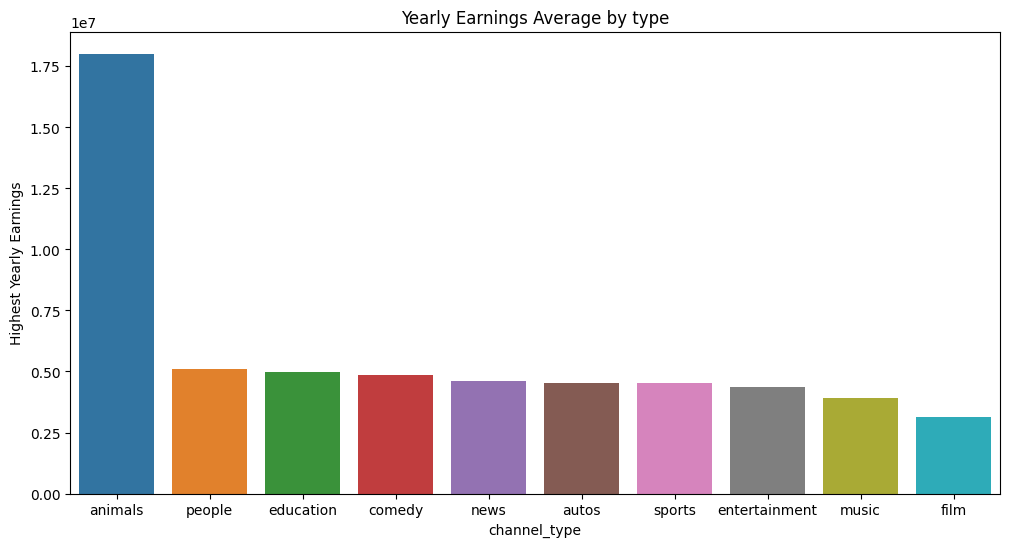

In [32]:
# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size as per your preference
sns.barplot(
    data=top_categories_earnings,
    x='channel_type',
    y='yearly_earnings',
)

# Add title and labels
plt.title('Yearly Earnings Average by type')
plt.xlabel('channel_type')
plt.ylabel('Highest Yearly Earnings')

# Display the plot
plt.show()

### Geographical Analysis
Now we can take a look at another view of the world of youtube top channels.

Literally talking about the world!

What kind of interesting insights can we get by looking at the relationship between the location of a certain top-performing youtube channel and its other characteristics?

Let's take a look at that.

In [33]:
df_geo_subscribers = df.groupby('Country')['subscribers'].mean().reset_index()

df_geo_subscribers.sort_values( 'subscribers', inplace=True, ascending=False )

df_geo_subscribers = df_geo_subscribers.head(20)

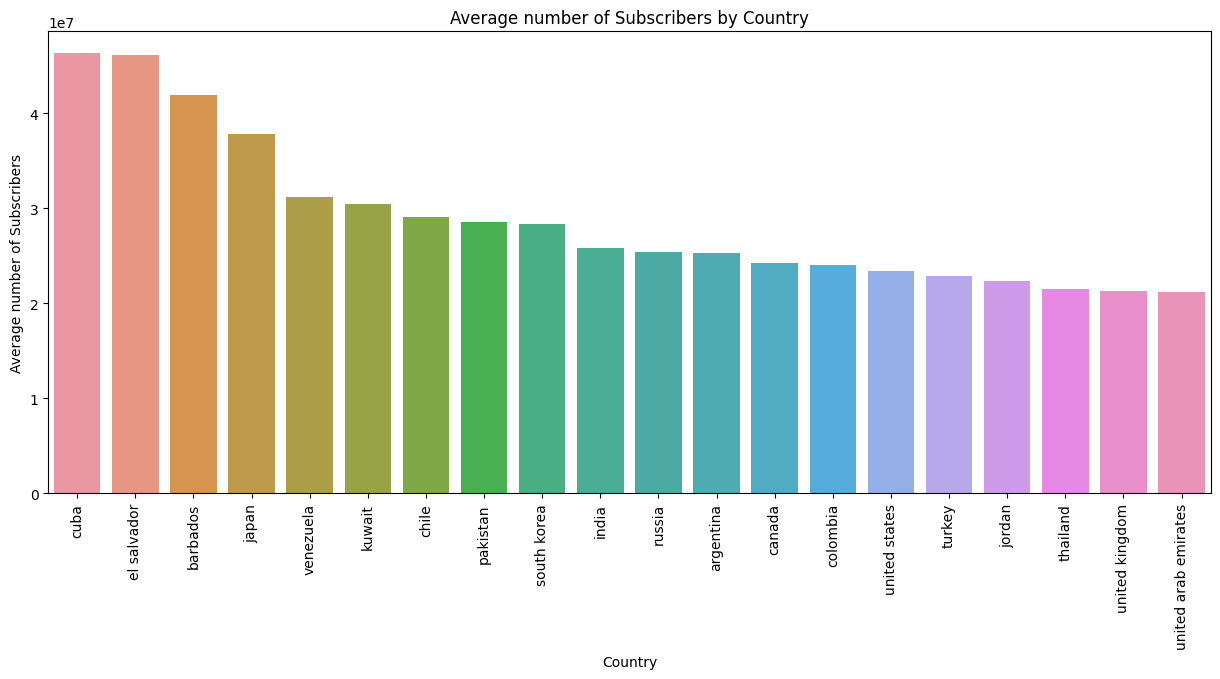

In [34]:
plt.figure(figsize=(15, 6))
sns.barplot(
    data=df_geo_subscribers,
    x='Country',
    y='subscribers')

# Add title and labels
plt.title('Average number of Subscribers by Country')
plt.xlabel('Country')
plt.ylabel('Average number of Subscribers')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [35]:
import plotly.express as px

px.choropleth(df_geo_subscribers,
                    locations="Country",
                    locationmode='country names',
                    color='subscribers',
                    title="Average number of Subscribers by Country")

The comparasion of the average of subscribers between countries show us no relevant differentiation between them in the realm of high-achieving youtube channels.

However, we can have a more complete view of the situation by looking at more than just the mean.

Analyzing the quantity of channels in each country, we can better analyze how biased this dataset may be regarding sample sizes for each country.

In [36]:
df_geo_count = df.groupby('Country')['subscribers'].count().reset_index()
df_geo_count = df_geo_count.rename(columns = {'subscribers': "Count of channels"})

px.choropleth(df_geo_count,
                    locations="Country",
                    locationmode='country names',
                    color='Count of channels',
                    color_continuous_scale=px.colors.sequential.Emrld ,
                    title="Amount of channels per Country")

US, Brazil and India contain the majority of the channels.

All others seem to be represented with some entries, but they are just a few.

# Conclusion
- The data indicates that 'Animals' are the fastest growing categories.

- They are also the fastest in the context of earning.

- But among the high-performing channels, music and entertainment categories stand out as the more dominant ones.

- So 'Music' or 'Entertainment' would be a strong category to go with if aiming for a popular YouTube channel in the longer run.

- Our analysis revealed a notable concentration of channels in the dataset from the United States and India.

- The results could be impacted by insufficient data as we only have few rows per category.

- Also, the dataset may not be fully representative of the diverse audience behaviors present in every different geographical location.